<a href="https://colab.research.google.com/github/anthonyckleung/Digital-Marketing-Mix/blob/master/marketing_mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

plt.rcParams['figure.facecolor'] = 'w' # For Colab in dark mode
sns.set()
#current_palette = sns.color_palette("cubehelix")
#current_palette = sns.color_palette("Paired")
#sns.set_palette(current_palette)

# Specify the custom font to use

plt.rcParams["axes.labelweight"] = "bold"

# Save path for whatever needs to be output
save_path = ''

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount = False)

In [0]:
# Data file path
path = ''

In [0]:
df = pd.read_csv(path)

In [0]:
df.head()

,Day,Social,Google Adwords,Youtube,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9


In [0]:
cols = df.columns.tolist()

# Exploratory Data Analysis

Look at the time series of these records.

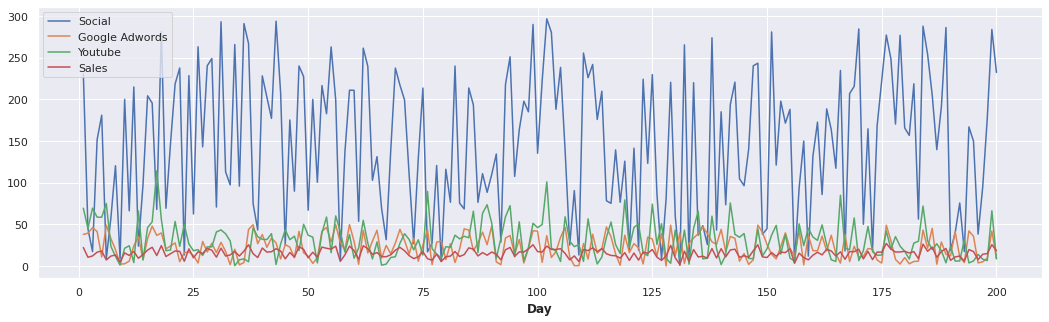

In [0]:
ax = plt.gca()

for col in cols:
  if col != 'Day':
    df.plot(x='Day', y=col, figsize=(18, 5), ax=ax)

**OBSERVATIONS**: From the plot, it is evident that the spending on Social is the most and it is much larger that the sales figure throughout.

Plot the sales wrt to each of the advertising spend

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


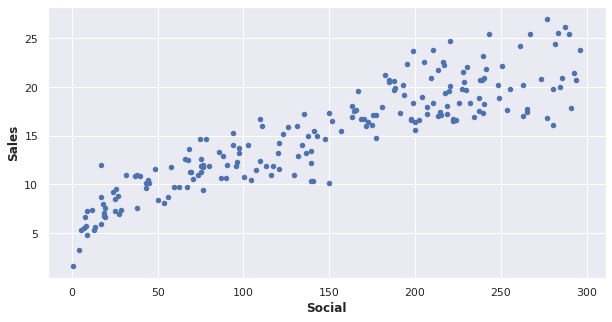

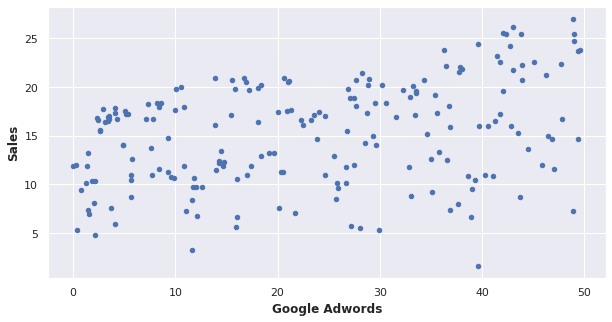

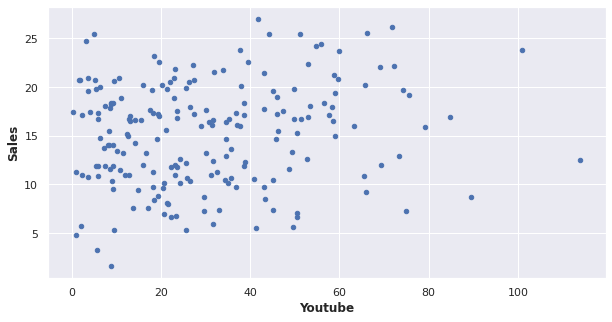

In [0]:
spends = ['Social', 'Google Adwords', 'Youtube']
for col in spends:
  df.plot(x=col, y='Sales', kind='scatter', figsize=(10, 5))

**OBSERVATIONS**: 
* A clear linear trend is shown for `Social`.
* A weak linear trend is shown for `Google Adwords`
* No clear trend is shown for `Youtube`.

# Data Preprocessing

In [0]:
lin_data = df[['Social','Google Adwords', 'Youtube', 'Sales']]

In [0]:
lin_data.head()

,Social,Google Adwords,Youtube,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [0]:
cols = [
        'Social',
        'GoogleAdWords',
        'Youtube',
        'Sales'
]

In [0]:
lin_data.columns = cols

# MMM: Linear Regression

Assume there is base sale

In [0]:
lin_model = smf.ols(formula = '''Sales ~ 
                               Social + GoogleAdWords + Youtube 
                               ''', data = lin_data).fit()

In [0]:
print(lin_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           8.13e-99
Time:                        18:13:15   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.6251      0.308     15.041

**OBSERVATIONS**:
* R^2 value of 0.903
* `Social` and `GoogleAdwords` are significant for this model. The incremental impact on revenue is highest in `GoogleAdwords`.
* `Youtube` has no significance in the model.

Without base sale

In [0]:
lin_model = smf.ols(formula = '''Sales ~ 
                               Social + GoogleAdWords + Youtube -1
                               ''', data = lin_data).fit()

In [0]:
print(lin_model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2826.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):                   1.35e-161
Time:                        18:13:15   Log-Likelihood:                         -460.08
No. Observations:                 200   AIC:                                      926.2
Df Residuals:                     197   BIC:                                      936.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

**OBSERVATIONS**: 
* R^2 value of 0.980
* All channels are deemed significant. Parameters themselves are larger than previous model.